In [1]:
cd D:\Sabudh\Data\student dataset

D:\Sabudh\Data\student dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('student-mat.csv',sep=';')

# EDA :

In [4]:
#data.info()

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


SCHOOLS vs FINAL_GRADES (males/female)

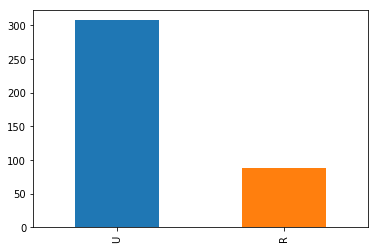

In [6]:
data['address'].value_counts().plot(kind='bar') #More people from urban area than rural

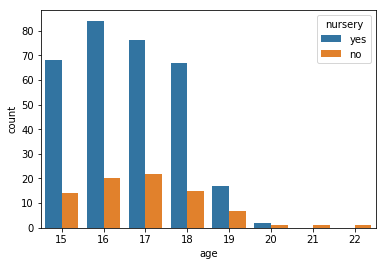

In [7]:
sns.countplot(data['age'],hue=data['nursery']) 
# 15-18 is the dominant age group in the dataset
# very few of them have attended nursery

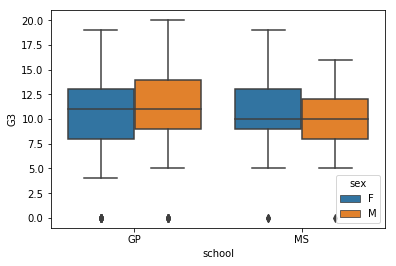

In [8]:
sns.boxplot(x=data['school'],y=data['G3'],hue=data['sex'])
# Conclusion: In school 'GP' male students get good grades whereas in school 'MS' female students do better 

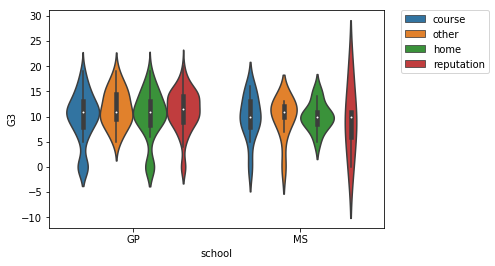

In [9]:
sns.violinplot(x=data['school'],y=data['G3'],hue=data['reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)     #puts legend outside of plot

# marks distribution in 'MS' school is more diverse/extreme
# reason for chosing school is not a big contributor in scoring good marks especially in 'GP' school
#

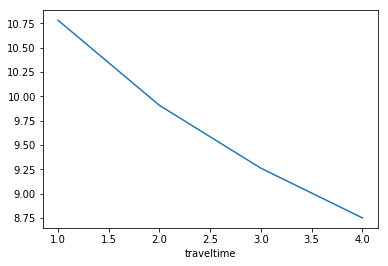

In [10]:
data.groupby('traveltime').mean()['G3'].plot()
# As travel time between home and school increases,marks in final exams decrease

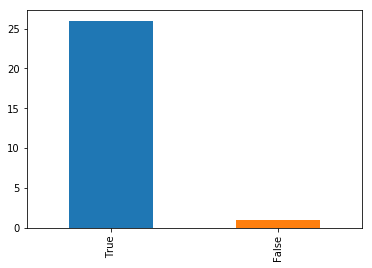

In [11]:
theshold=15
(data[(data['G1']>theshold) & (data['G2']>theshold)]['G3']>theshold).value_counts().plot(kind='bar')

# Students who do well in G1 and G2 also do well in final G3 and vice versa

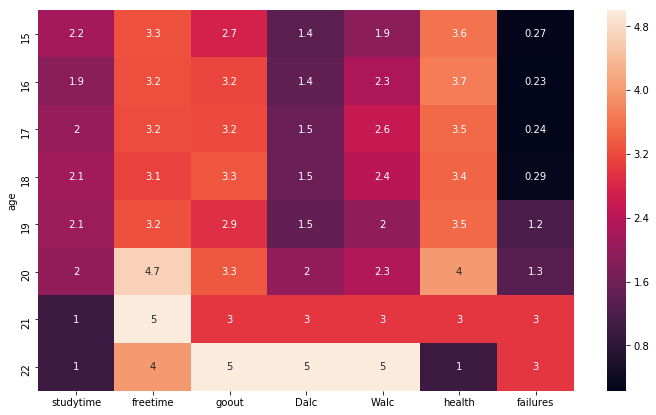

In [12]:
plt.subplots(figsize=(12,7))
sns.heatmap(data.groupby('age')['studytime','freetime','goout','Dalc','Walc','health','failures'].mean(),annot=True)

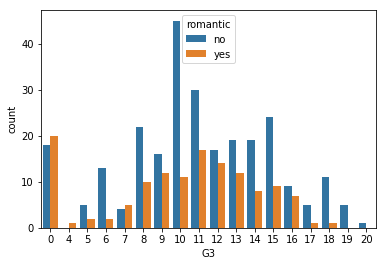

In [13]:
sns.countplot(data['G3'],hue=data['romantic'])
#students in a relationship generally score low marks

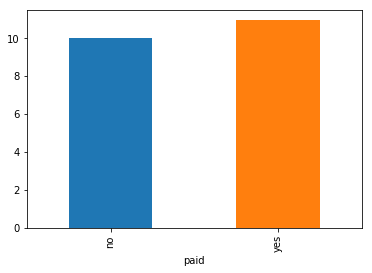

In [14]:
data.groupby('paid')['G3'].mean().plot(kind='bar')
# students with extra classes do a little better

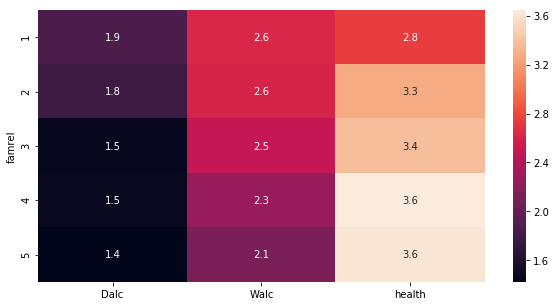

In [15]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.groupby('famrel')['Dalc','Walc','health'].mean(),annot=True)

# As family relationship improves the alcohol consumption decreases and health improves 

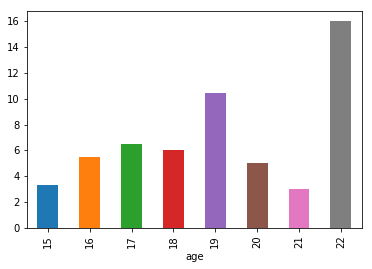

In [16]:
data.groupby('age')['absences'].mean().plot(kind='bar')
# More absences in age 19 and 22

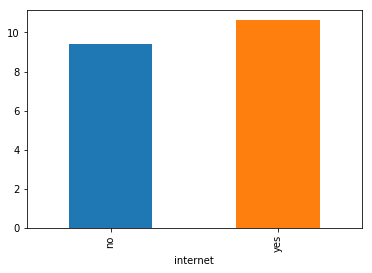

In [17]:
data.groupby('internet')['G3'].mean().plot(kind='bar')
# students with internet connection at home do a little better

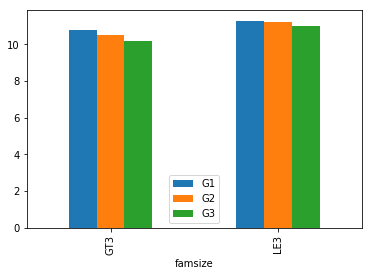

In [18]:
data.groupby('famsize')['G1','G2','G3'].mean().plot(kind='bar')
# a little better results for family size less than or equals to 3

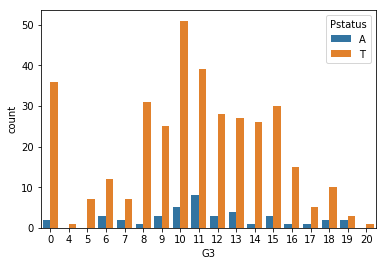

In [19]:
sns.countplot(data['G3'],hue=data['Pstatus'])
#students with parents together or apart

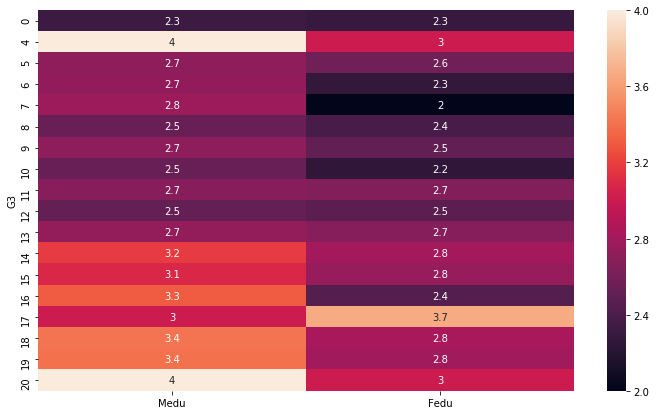

In [20]:
plt.subplots(figsize=(12,7))
sns.heatmap(data.groupby('G3')['Medu','Fedu'].mean(),annot=True)

# If Parents are more educated,generally students score good marks

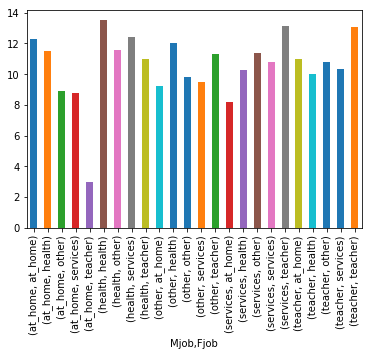

In [21]:
data.groupby(['Mjob','Fjob'])['G3'].mean().plot(kind='bar')

# if mother is at home then student scores low , otherwise no such notable trend

# Feature Selection :

In [22]:
#one-hot encoding
cat_vars=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','Medu','Fedu','traveltime','studytime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]

In [23]:
#X=np.array(data_final)
#X=np.delete(X,[15],1)
data_final_vars=data_final.columns.values.tolist()
Y=np.array(data_final['G3']).reshape(-1,1)
yy=['G3']
X=data_final[[i for i in data_final if i not in yy]].values

In [24]:
#data_final[[i for i in data_final if i not in yy]]['G3']

In [25]:
priority=['age','address_R', 'address_U', 'sex_F', 'sex_M','failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
           'traveltime_1', 'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4','nursery_no', 'nursery_yes',
          'traveltime_2', 'traveltime_3', 'traveltime_4','G1', 'G2','school_GP', 'school_MS','activities_no', 'activities_yes', 'Medu_0',
          'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4','Mjob_at_home', 
          'famsize_GT3', 'famsize_LE3', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 
          'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 
          'famsup_yes', 'romantic_yes', 'romantic_no','paid_no', 'paid_yes', 
          'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'Pstatus_A', 'Pstatus_T',  'Mjob_health', 
          'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 
          'Fjob_services', 'Fjob_teacher']
n=6
combination={}
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cols=priority[:n]
regressor= LinearRegression()

In [26]:
#np.concatenate((np.array(str(cols)).reshape(-1),np.array(str(mse)).reshape(-1)))
#list(combination.values())[0]
def subsets(s):
    if s == []:
        return [s]
    sets = [s]
    for i in range(0, len(s)):
        tmp_subsets = subsets(s[:i] + s[i+1:])
        for subset in tmp_subsets:
            if subset not in sets:
                sets.append(subset)
    return sets
for cols in subsets(cols):
    if len(cols)==0:
        continue
    regressor.fit(data_final[cols].values,Y)
    mse=mean_squared_error(Y,regressor.predict(data_final[cols].values))
    #combination=np.concatenate((np.array(str(cols)).reshape(-1),np.array(str(mse)).reshape(-1)))
    combination[mse]=cols

In [27]:
old_mse=min(combination.keys())
cols_new=combination[old_mse]
for i in range(n+1,len(priority)):
    cols_new.append(priority[i])
    regressor.fit(data_final[cols_new].values,Y)
    new_mse=mean_squared_error(Y,regressor.predict(data_final[cols_new].values))
    if new_mse-old_mse >0.00000000000000001:
        cols_new.pop()
    else:
        old_mse=new_mse

In [28]:
len(cols_new),len(priority)
removed_features=[i for i in priority if i not in cols_new]
removed_features,old_mse

(['sex_M',
  'famrel',
  'school_MS',
  'activities_yes',
  'famsize_LE3',
  'romantic_no',
  'paid_yes',
  'higher_yes',
  'internet_yes',
  'Fjob_teacher'],
 3.1549672223230716)

# Model

In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
regressor.fit(data_final[cols_new].values,Y)
Y_pred=regressor.predict(data_final[cols_new].values)
mse=mean_squared_error(Y,Y_pred)

In [30]:
mse

3.1549672223230716